# Import libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load data

In [64]:
df_weather = pd.read_csv("data/weather_burbank_airport.csv")
df_ev = pd.read_csv("data/charging_sessions.csv")

In [65]:
df_weather

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0


In [8]:
df_ev

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."


# Data Preparation 

## Dtypes

In [23]:
# Check dtypes 

print(df_weather.dtypes)
print(df_ev.dtypes)

city                               object
timestamp                  datetime64[ns]
temperature                       float64
cloud_cover                       float64
cloud_cover_description          category
pressure                          float64
windspeed                         float64
precipitation                     float64
felt_temperature                  float64
dtype: object
Unnamed: 0            int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
siteID                int64
spaceID              object
stationID            object
timezone             object
userID              float64
userInputs           object
dtype: object


In [66]:
# Convert dtypes 

# Weather
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])  
df_weather['cloud_cover_description'] = df_weather['cloud_cover_description'].astype('category')  

# EV (needed to filter relevant timeframe)
df_ev['connectionTime'] = pd.to_datetime(df_ev['connectionTime'])  
df_ev['disconnectTime'] = pd.to_datetime(df_ev['disconnectTime'])  
# Remove UTC info
df_ev['connectionTime'] = df_ev['connectionTime'].dt.tz_localize(None)
df_ev['disconnectTime'] = df_ev['disconnectTime'].dt.tz_localize(None)

# Check new dtypes

print(df_weather.dtypes)
print(df_ev.dtypes)


city                               object
timestamp                  datetime64[ns]
temperature                       float64
cloud_cover                       float64
cloud_cover_description          category
pressure                          float64
windspeed                         float64
precipitation                     float64
felt_temperature                  float64
dtype: object
Unnamed: 0                   int64
id                          object
connectionTime      datetime64[ns]
disconnectTime      datetime64[ns]
doneChargingTime            object
kWhDelivered               float64
sessionID                   object
siteID                       int64
spaceID                     object
stationID                   object
timezone                    object
userID                     float64
userInputs                  object
dtype: object


## Filter timeframe 

In [69]:
# Filter weather data to relevant timeframe

print(f"Weather Min Date: {df_weather['timestamp'].min()} (before)")
print(f"Weather Max Date: {df_weather['timestamp'].max()} (before)")
print(f"EV Connection Min Date: {df_ev['connectionTime'].min()} (before)")
print(f"EV Connection Max Date: {df_ev['connectionTime'].max()} (before)")

# Bases on min/max dates of each dataset, we have to use the timeframe where both datasets are filled. Therefore, analysis timeframe will be 2018-04-25 until 2021-01-01 

# Filter Weather data

cutoff_weather = df_ev['connectionTime'].min() - pd.Timedelta(hours=0.5) # use connectionTime min date - 0.5h to include weather data right befor first ev entry 
df_weather = df_weather[df_weather['timestamp'] >= cutoff_weather]

# reset index
df_weather.reset_index(drop=True, inplace=True)

# Check new weather data timeframe

print(f"Weather Min Date: {df_weather['timestamp'].min()} (after)")
print(f"Weather Max Date: {df_weather['timestamp'].max()} (after)")



Weather Min Date: 2018-04-25 10:42:00 (before)
Weather Max Date: 2021-01-01 07:53:00 (before)
EV Connection Min Date: 2018-04-25 11:08:04 (before)
EV Connection Max Date: 2021-09-14 05:43:39 (before)
Weather Min Date: 2018-04-25 10:42:00 (after)
Weather Max Date: 2021-01-01 07:53:00 (after)


## Remove irrelevant data

In [ ]:
# Remove city column as it only contains one value 
print(df_weather.city.value_counts())
df_weather.drop(columns=['city'], inplace=True)

city
Burbank    26209
Name: count, dtype: int64


## Missing Values

In [76]:
# Check for missing values in each column

missing_values = df_weather.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
timestamp                   0
temperature                25
cloud_cover                20
cloud_cover_description    20
pressure                    8
windspeed                  81
precipitation               0
felt_temperature           26
dtype: int64


### Handle missing (felt) temperature 


In [94]:
# missing temperature  

missing_temperature = df_weather[df_weather['temperature'].isnull()]
missing_temperature

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
717,2018-05-21 17:35:00,NaN,20.0,Fog,983.84,9.0,0.0,NaN
5408,2018-11-17 14:53:00,NaN,20.0,Fog,989.11,0.0,0.0,NaN
13947,2019-09-23 06:53:00,NaN,33.0,Fair,984.50,9.0,0.0,NaN
13950,2019-09-23 08:53:00,NaN,33.0,Fair,984.50,6.0,0.0,NaN
13953,2019-09-23 10:53:00,NaN,33.0,Fair,984.17,0.0,0.0,NaN
15103,2019-11-07 08:53:00,NaN,20.0,Fog,989.11,0.0,0.0,NaN
15217,2019-11-11 07:23:00,NaN,20.0,Fog,987.47,6.0,0.0,NaN
15287,2019-11-13 11:53:00,NaN,20.0,Fog,987.47,0.0,0.0,NaN
15288,2019-11-13 12:41:00,NaN,20.0,Fog,987.47,0.0,0.0,NaN
16160,2019-12-14 10:45:00,NaN,20.0,Fog,987.47,0.0,0.0,NaN


In [99]:
# missing values are scattered irregularly throughout the dataset, not concentrated in a specific period
# data is hourly, so temporal relationships like trends in adjacent hours are essential

# Linear interpolation 
df_weather['temperature'] = df_weather['temperature'].interpolate(method='linear')

# same applies to felt_temperature
df_weather['felt_temperature'] = df_weather['felt_temperature'].interpolate(method='linear')


In [104]:
# Check interpolated temperatures on 2019-12-14:
# temperature values are missing between 2019-12-14 10:45:00 and 2019-12-14 11:53:00 (see above)
# last known temperature before is 2019-12-14 09:53:00 with	12.00 degrees
# first known temperature after is 2019-12-14 12:50:00 with 13.00 degrees
# interpolated temperature values capture the linear trend by assigning 12.25; 12.50 and 12.75 for the three missing values 

df_weather[df_weather['timestamp'].dt.date == pd.Timestamp('2019-12-14').date()]


,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
16144,2019-12-14 00:53:00,17.00,29.0,Partly Cloudy,988.78,7.0,0.0,17.00
16145,2019-12-14 01:53:00,16.00,29.0,Partly Cloudy,988.45,9.0,0.0,16.00
16146,2019-12-14 02:53:00,15.00,21.0,Haze,988.45,11.0,0.0,15.00
16147,2019-12-14 03:53:00,14.00,29.0,Partly Cloudy,988.45,7.0,0.0,14.00
16148,2019-12-14 04:53:00,14.00,33.0,Fair,988.45,0.0,0.0,14.00
16149,2019-12-14 05:45:00,13.00,27.0,Mostly Cloudy,988.45,6.0,0.0,13.00
16150,2019-12-14 05:53:00,13.00,27.0,Mostly Cloudy,988.78,6.0,0.0,13.00
16151,2019-12-14 06:03:00,13.00,26.0,Cloudy,988.78,6.0,0.0,13.00
16152,2019-12-14 06:12:00,13.00,20.0,Fog,988.78,9.0,0.0,13.00
16153,2019-12-14 06:53:00,13.00,20.0,Fog,988.45,9.0,0.0,13.00


### Handle missing cloud cover (description)


In [106]:
# missing cloud  

missing_cloud = df_weather[df_weather['cloud_cover'].isnull()]
missing_cloud

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
3028,2018-08-20 07:53:00,23.0,NaN,NaN,984.17,9.0,0.0,23.0
11268,2019-06-13 03:53:00,19.0,NaN,NaN,984.50,19.0,0.0,19.0
12324,2019-07-21 00:53:00,26.0,NaN,NaN,983.19,13.0,0.0,26.0
12524,2019-07-29 08:53:00,20.0,NaN,NaN,985.16,7.0,0.0,20.0
12549,2019-07-30 05:53:00,22.0,NaN,NaN,983.84,7.0,0.0,22.0
13296,2019-08-28 07:53:00,21.0,NaN,NaN,984.50,11.0,0.0,21.0
14502,2019-10-14 04:53:00,16.0,NaN,NaN,983.84,6.0,0.0,16.0
14503,2019-10-14 05:53:00,16.0,NaN,NaN,984.17,6.0,0.0,16.0
15229,2019-11-11 11:23:00,13.0,NaN,NaN,987.47,6.0,0.0,13.0
17713,2020-02-13 07:53:00,9.0,NaN,NaN,990.10,0.0,0.0,9.0


### Handle missing pressure


In [108]:
# missing pressure  

missing_pressure = df_weather[df_weather['pressure'].isnull()]
missing_pressure

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
408,2018-05-10 21:53:00,24.0,34.0,Fair,NaN,19.0,0.0,24.0
562,2018-05-16 05:53:00,16.0,33.0,Fair,NaN,6.0,0.0,16.0
588,2018-05-17 05:53:00,17.0,33.0,Fair,NaN,11.0,0.0,17.0
592,2018-05-17 09:53:00,14.0,33.0,Fair,NaN,6.0,0.0,14.0
593,2018-05-17 10:53:00,14.0,33.0,Fair,NaN,11.0,0.0,14.0
594,2018-05-17 11:53:00,13.0,33.0,Fair,NaN,0.0,0.0,13.0
595,2018-05-17 12:53:00,13.0,34.0,Fair,NaN,6.0,0.0,13.0
597,2018-05-17 13:53:00,13.0,34.0,Fair,NaN,6.0,0.0,13.0


### Handle missing windspeed



In [110]:
# missing windspeed

missing_windspeed = df_weather[df_weather['windspeed'].isnull()]
missing_windspeed

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
12,2018-04-25 18:53:00,22.0,34.0,Fair,990.10,NaN,0.0,22.0
40,2018-04-26 19:53:00,22.0,34.0,Fair,987.80,NaN,0.0,22.0
92,2018-04-28 18:53:00,20.0,34.0,Fair,986.15,NaN,0.0,20.0
577,2018-05-16 19:53:00,22.0,34.0,Fair,987.47,NaN,0.0,22.0
814,2018-05-24 23:26:00,17.0,26.0,Cloudy,989.44,NaN,0.0,17.0
...,...,...,...,...,...,...,...,...
23865,2020-09-30 19:53:00,41.0,34.0,Fair,985.16,NaN,0.0,37.0
24411,2020-10-21 20:53:00,23.0,21.0,Haze,981.54,NaN,0.0,23.0
24491,2020-10-24 22:53:00,21.0,26.0,Cloudy,985.16,NaN,0.0,21.0
25239,2020-11-25 00:53:00,17.0,33.0,Fair,988.45,NaN,0.0,17.0


## Timestamp counts by date

In [77]:
# As weather data is described as hourly, this checks the number of entries per day 

# Group by date and count the entries
daily_counts = df_weather.groupby(df_weather['timestamp'].dt.date).size()

# Check for days with fewer than 24 entries
missing_days = daily_counts[daily_counts < 24]
if not missing_days.empty:
    print("Days with fewer than 24 entries:")
    print(missing_days)
else:
    print("All days have at least 24 entries.")

Days with fewer than 24 entries:
timestamp
2018-04-25    18
2018-05-09    23
2018-06-12    23
2018-08-11    19
2018-08-25    22
2018-10-17    23
2018-12-03    23
2019-04-24    23
2019-05-29     8
2019-07-26    23
2019-10-15    23
2020-01-03    23
2020-02-13    23
2020-11-08     2
2020-11-09     9
2020-11-10    23
2020-11-18    21
2020-12-08    23
2021-01-01     8
dtype: int64


In [105]:
# Check date 2019-05-29 with only 8 entries

df_weather[df_weather['timestamp'].dt.date == pd.Timestamp('2019-05-29').date()]


,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
10877,2019-05-29 00:53:00,20.0,34.0,Fair,982.86,17.0,0.0,20.0
10878,2019-05-29 01:53:00,19.0,34.0,Fair,982.86,15.0,0.0,19.0
10879,2019-05-29 02:53:00,18.0,34.0,Fair,983.19,9.0,0.0,18.0
10880,2019-05-29 03:53:00,17.0,33.0,Fair,983.84,9.0,0.0,17.0
10881,2019-05-29 04:53:00,17.0,33.0,Fair,983.84,9.0,0.0,17.0
10882,2019-05-29 05:53:00,16.0,33.0,Fair,984.17,9.0,0.0,16.0
10883,2019-05-29 06:53:00,16.0,33.0,Fair,983.84,7.0,0.0,16.0
10884,2019-05-29 23:53:00,23.0,34.0,Fair,982.20,15.0,0.0,23.0


## Outliers

Outliers in temperature: 225
Outliers in cloud_cover: 988
Outliers in pressure: 494
Outliers in windspeed: 483
Outliers in precipitation: 960
Outliers in felt_temperature: 108


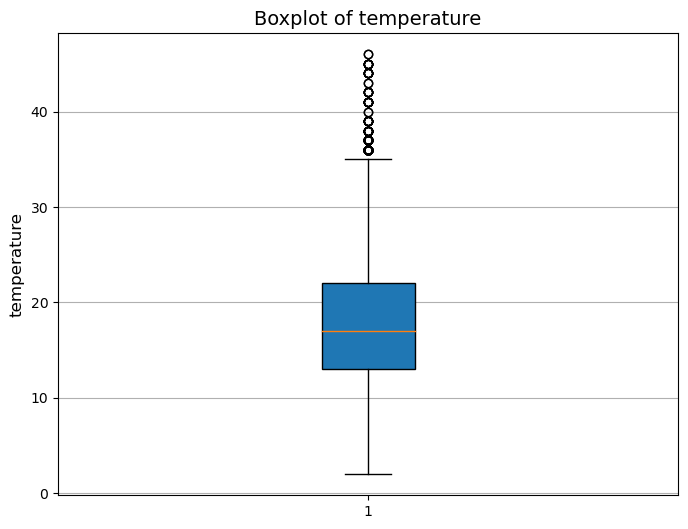

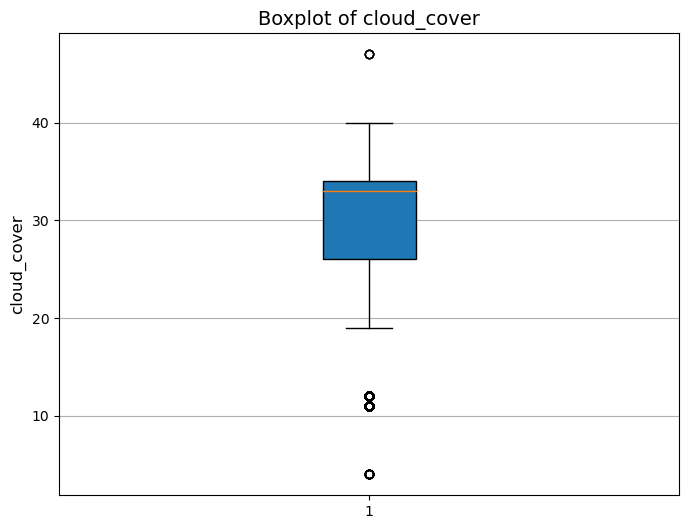

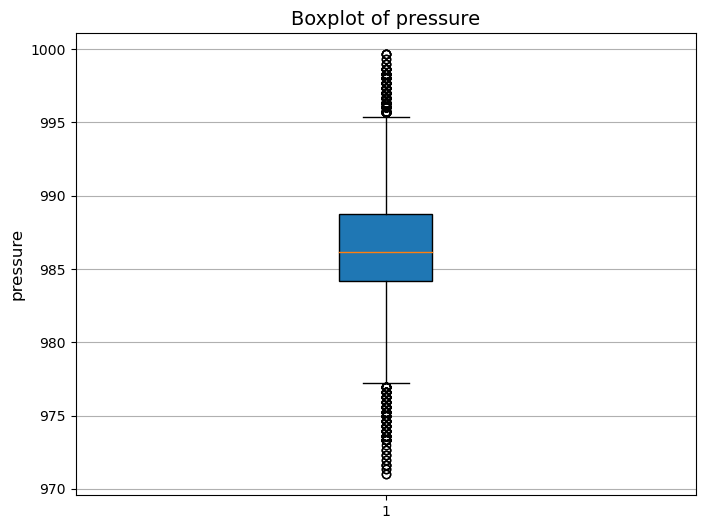

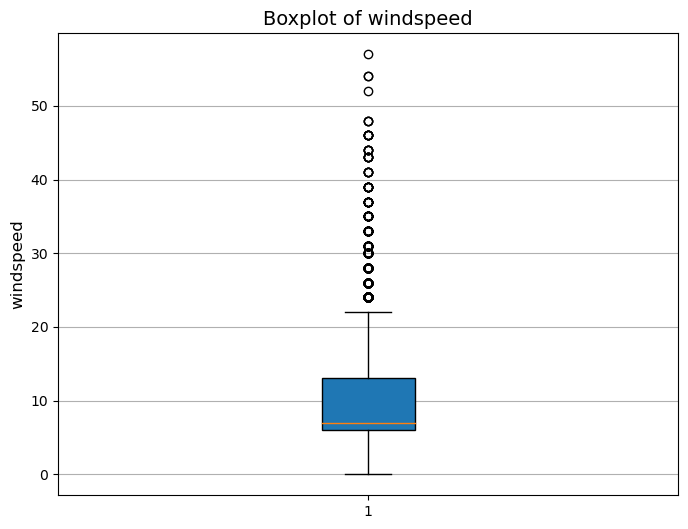

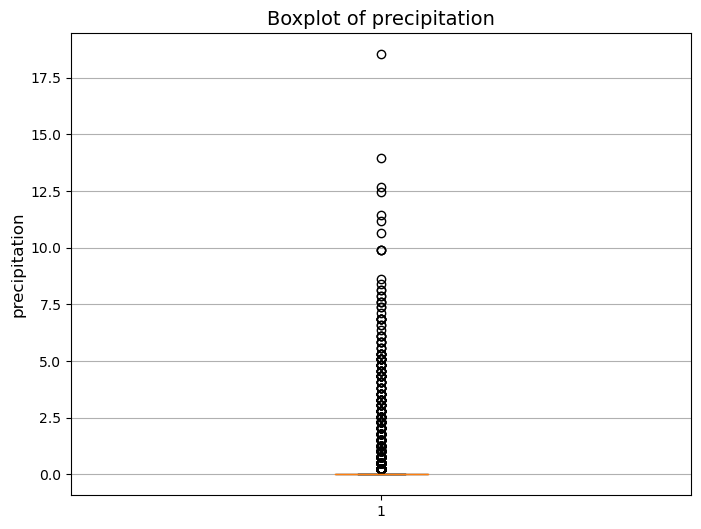

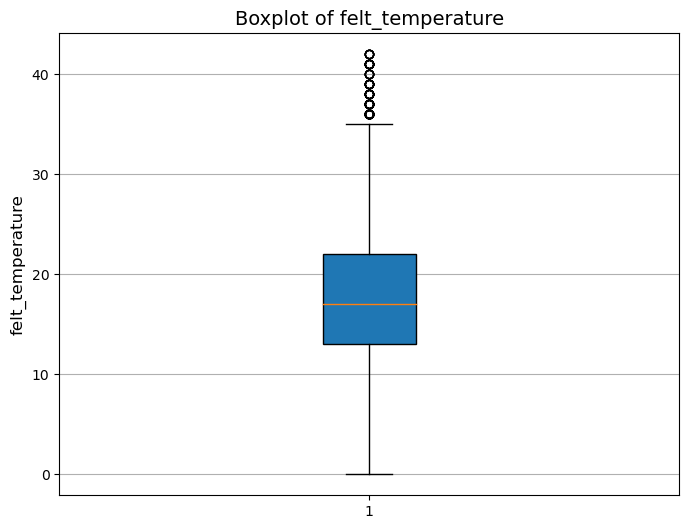

In [86]:
# Detect outliers using the IQR method
numerical_columns = ['temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation', 'felt_temperature']
for column in numerical_columns:
    Q1 = df_weather[column].quantile(0.25)  # First quartile
    Q3 = df_weather[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_weather[(df_weather[column] < lower_bound) | (df_weather[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)}")

# Boxplot for each column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_weather[column].dropna(), vert=True, patch_artist=True, showfliers=True)
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel(column, fontsize=12)
    plt.grid(axis='y')
    plt.show()


In [107]:
# TODO's

# finish missing value handling (cloud, pressure, windspeed)
# handle days with less than 24 entries
# handle outliers